In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load the Dataset
df = pd.read_csv("scaled_features.csv")

display(df.head())

#check duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows :", duplicate_rows_df.shape)

df = df.drop_duplicates()
df.head()

#Check Missing or Null values
print(df.isnull().sum())


,Unnamed: 0,OP_CARRIER_FL_NUM_z,DEP_TIME_z,DEP_DELAY_z,TAXI_OUT_z,WHEELS_OFF_z,WHEELS_ON_z,TAXI_IN_z,ARR_TIME_z,ARR_DELAY_z,...,OP_UNIQUE_CARRIER_OH_z,OP_UNIQUE_CARRIER_OO_z,OP_UNIQUE_CARRIER_UA_z,OP_UNIQUE_CARRIER_WN_z,OP_UNIQUE_CARRIER_YV_z,OP_UNIQUE_CARRIER_YX_z,IS_DELAYED_ARR_z,IS_DELAYED_DEP_z,IS_WEEKEND_z,TOTAL_DELAY_CAUSES_z
0,5776123,-0.446192,-0.162374,3.092152,-0.452036,-0.186083,0.387339,-0.463477,0.383734,2.688507,...,-0.200095,-0.356082,-0.298024,2.083878,-0.174762,-0.215010,1.680634,1.660421,-0.601758,3.947942
1,7266449,-0.679221,0.044572,-0.185569,-0.215183,0.020785,0.095831,-0.285011,0.092302,0.013821,...,-0.200095,-0.356082,-0.298024,2.083878,-0.174762,-0.215010,-0.595014,-0.602257,-0.601758,-0.304137
2,1600847,2.104869,0.231230,-0.083140,-0.688890,0.203316,0.142786,0.071920,0.146703,-0.053047,...,-0.200095,-0.356082,-0.298024,-0.479875,5.722061,-0.215010,-0.595014,-0.602257,1.661796,-0.304137
3,3534403,0.108508,0.486870,-0.083140,-0.925744,0.454803,0.518420,0.071920,0.519735,-0.922320,...,-0.200095,-0.356082,-0.298024,-0.479875,-0.174762,-0.215010,-0.595014,-0.602257,-0.601758,-0.304137
4,2528066,1.036724,-0.312512,-0.697713,-0.807317,-0.261124,-0.246544,0.071920,-0.239930,-1.524124,...,-0.200095,-0.356082,-0.298024,-0.479875,-0.174762,4.650942,-0.595014,-0.602257,-0.601758,-0.304137


Number of duplicate rows : (0, 40)
Unnamed: 0                0
OP_CARRIER_FL_NUM_z       0
DEP_TIME_z                0
DEP_DELAY_z               0
TAXI_OUT_z                0
WHEELS_OFF_z              0
WHEELS_ON_z               0
TAXI_IN_z                 0
ARR_TIME_z                0
ARR_DELAY_z               0
AIR_TIME_z                0
DISTANCE_z                0
WEATHER_DELAY_z           0
NAS_DELAY_z               0
SECURITY_DELAY_z          0
LATE_AIRCRAFT_DELAY_z     0
YEAR_z                    0
MONTH_z                   0
DAY_OF_WEEK_z             0
OP_UNIQUE_CARRIER_9E_z    0
OP_UNIQUE_CARRIER_AA_z    0
OP_UNIQUE_CARRIER_AS_z    0
OP_UNIQUE_CARRIER_B6_z    0
OP_UNIQUE_CARRIER_DL_z    0
OP_UNIQUE_CARRIER_EV_z    0
OP_UNIQUE_CARRIER_F9_z    0
OP_UNIQUE_CARRIER_G4_z    0
OP_UNIQUE_CARRIER_HA_z    0
OP_UNIQUE_CARRIER_MQ_z    0
OP_UNIQUE_CARRIER_NK_z    0
OP_UNIQUE_CARRIER_OH_z    0
OP_UNIQUE_CARRIER_OO_z    0
OP_UNIQUE_CARRIER_UA_z    0
OP_UNIQUE_CARRIER_WN_z    0
OP_UNIQUE_CAR

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [12]:
X = df.drop(columns=['IS_DELAYED_ARR_z'])   
y = df['IS_DELAYED_ARR_z'] #target


In [13]:
#get features on the same scale.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
#apply PCA
pca = PCA(n_components=0.95)   # keep 95% of variance
X_pca = pca.fit_transform(X_scaled)


In [6]:
#Check variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components chosen:", pca.n_components_)


Explained variance ratio: [0.10332556 0.08082806 0.07059875 0.05268788 0.04945376 0.04723085
 0.03384565 0.03097317 0.03014112 0.02902752 0.02848575 0.02812783
 0.02775944 0.0274626  0.02741312 0.02728005 0.02719492 0.02704477
 0.02693657 0.02679912 0.02633904 0.02623788 0.02578004 0.02401895
 0.02281724 0.02008219 0.01414262]
Number of components chosen: 27


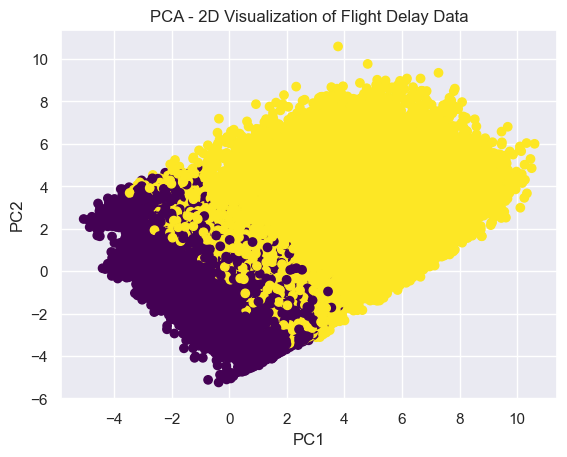

In [15]:
#Visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2D Visualization of Flight Delay Data')
plt.show()


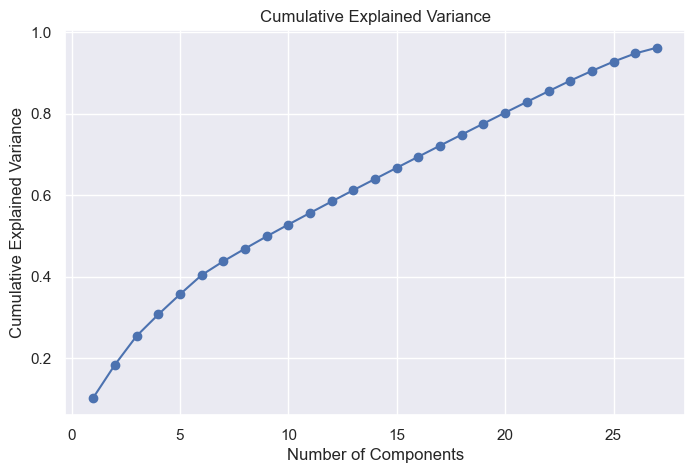

In [16]:
#cumulative explained variance plot
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()